In [1]:
# install the necessary packages
# !pip3 install gensim
# !pip3 install matplotlib
# !pip3 install pandas
# !pip3 install scikit-learn

path_simlex = '../../data/SimLex-999.txt'
path_human_ratings = '../../data/data_cleaned.csv'
path_ame_emb = '../../embeddings/coca_word2vec_no_lemmatize.embedding'
path_sge_emb = '../../embeddings/sgtb_word2vec_no_lemmatize.embedding'

In [2]:
# prepare the lists of word pairs
import csv


simlex_pairs_full = []

simlex_pairs = [
    ['formal','proper'], ['huge','dumb'], ['composer','writer'],
    ['carry','bring'], ['breathe','choke'], ['create','build'],
    ['situation','condition'], ['hard','simple'], ['absence','presence'],
    
    ['couple','pair'], ['aggression','hostility'], ['navy','army'],
    ['abundance','plenty'], ['old','new'], ['army','squad'],
    ['contemplate','think'], ['recent','new'], ['say','participate'],
    
    ['hard','difficult'], ['reality','illusion'], ['bring','restore'],
    ['inexpensive','cheap'], ['chemistry','theory'], ['sly','strange'],
    ['day','morning'], ['endurance','band'], ['word','dictionary'],
    
    ['unhappy','mad'], ['large','big'], ['kill','choke'],
    ['chicken','steak'], ['apple','sunshine'], ['danger','disease'],
    ['go','sell'], ['communicate','pray'], ['cab','bus'],
    
    ['nice','generous'], ['greet','meet'], ['dirty','narrow'],
    ['container','mouse'], ['leg','arm'], ['bean','coffee'],
    ['comfort','safety'], ['milk','juice'], ['friend','buddy'],
    
    ['creator','maker'], ['science','psychology'], ['dumb','intelligent'],
    ['corporation','business'], ['great','awful'], ['weird','normal'],
    ['sharp','dull'], ['overcome','dominate'], ['book','text'],
    
    ['modest','flexible'], ['mouth','tooth'], ['joy','pride'],
    ['easy','difficult'], ['leader','manager'], ['rhythm','melody'],
    ['receive','give'], ['marijuana','herb'], ['absorb','possess'],
    
    ['short','long'], ['simple','easy'], ['rat','mouse'],
    ['think','decide'], ['dollar','people'], ['friend','guest'],
    ['accept','believe'], ['game','fun'], ['boundary','border'],
    
    ['tobacco','cigarette'], ['street','alley'], ['belief','impression'],
    ['crowd','bunch'], ['kill','hang'], ['victory','triumph'],
    ['cloud','storm'], ['lawyer','banker'], ['old','fresh'],

    ['god','spirit'], ['guilty','ashamed'], ['explain','prove'],
    ['listen','hear'], ['make','earn'], ['accept','acknowledge'],
    ['big','heavy'], ['violent','angry'], ['come','bring'],

    ['forget','learn'], ['achieve','accomplish'], ['winter','season'],
    ['happy','young'], ['attention','awareness'], ['woman','wife'],
    ['protect','defend'], ['inform','notify'], ['cherish','keep'],
    ['leave','enter']
]

singlish_pairs = [
    ['can','okay'], ['blur','ignorant'],
    ['pattern','behavior'], ['mug','study'],
    ['chop','reserve'], ['hawker','peddler'],
    ['rubber','eraser'], ['biscuit','cookie'],
    ['vest','singlet'], ['keep','always'],
    ['letter','character'], ['lift','elevator'],
    ['bill','cheque'], ['chips','fries'],
    ['trolley','cart'], ['dummy','mannequin'],
    ['flat','apartment'], ['boot','expel'],
    ['rocket','vegetable'], ['takeaway','pack'],
    ['football','rugby']
]

singlish_pairs_wikipedia = [
    ['basket','bastard'], ['chop','reserve'], ['damn','very'],
    ['diam','quiet'], ['get','cheeky'], ['handphone','mobile'],
    ['mug','study'], ['orbit','old-fashioned'], ['photostat','photocopy'],
    ['pon','truant'], ['sod','mental'], ['solid','good'],
    ['song','nice'], ['toot','stupid'], ['un','understand'],
    ['arrow','delegate'], ['auntie','adult'], ['banana','western'],
    ['blur','clueless'], ['can','okay'], ['confirm','sure'],
    ['earpiece','headphone'], ['follow','understand'], ['got','have'],
    ['jam','congestion'], ['lightbulb','third-wheel'], ['never','yet'],
    ['one','de'], ['on','settled'], ['open','on'],
    ['power','good'], ['revert','reply'], ['send','drive'],
    ['solid','excellent'], ['steady','excellent'], ['spoil','broken'],
    ['stay','live'], ['step','act'], ['steady','attached'],
    ['steady','agree'], ['steady','capable'], ['stone','daydream'],
    ['take','eat'], ['uncle','adult'], ['until','extent']
]

# load the full simlex dataset
with open(path_simlex, 'r') as f:
    csv_reader = csv.reader(f, delimiter="\t")
    titles = next(csv_reader)
    for _, row in enumerate(csv_reader):
        simlex_pairs_full.append([row[0], row[1]])

In [3]:
# load word embeddings
from gensim.models import Word2Vec


sgtb_emb = Word2Vec.load(path_sge_emb)
coca_emb = Word2Vec.load(path_ame_emb)

In [4]:
# import human scores
import re
from collections import defaultdict


def load_human_scores(fileName, human_scores):
    with open(fileName, 'r') as f:
        csv_reader = csv.reader(f, delimiter=',')
        titles = next(csv_reader)

        # extract scores from csv
        tmp_dict = defaultdict(list)
        for _, row in enumerate(csv_reader):
            for j, title in enumerate(titles):
                tmp_dict[title].append(row[j])

        # retrieve the corresponding pair from each question number
        for k, v in tmp_dict.items():
            if re.search('^Q[0-9]+_[0-9]+$', k):
                tmp = k.split('_')
                tmp = [int(tmp[0][1:]), int(tmp[1])]
                
                if (tmp[0] == 11 and tmp[1] == 10) or tmp[1] < 10: # SimLex word pair
                    idx = (tmp[0] - 1) * 9 + tmp[1] - 1
                    key = tuple(simlex_pairs[idx])
                    human_scores[key] = v

                elif tmp[1] < 12: # Singlish word pair
                    idx = (tmp[0] - 1) * 2 + tmp[1] - (10 if tmp[0] != 11 else 11)
                    key = tuple(singlish_pairs[idx])
                    human_scores[key] = v


human_scores = {}
load_human_scores(path_human_ratings, human_scores)

In [5]:
# prepare helper functions
def get_emb_score(word1, word2, emb, print_missing_keys = False):
    try:
        return emb.wv.similarity(word1, word2)
    except Exception as e:
        if print_missing_keys:
            print('emb missing key:', e)
        return None

linear regression coefficient of determination: 0.7648408297584712


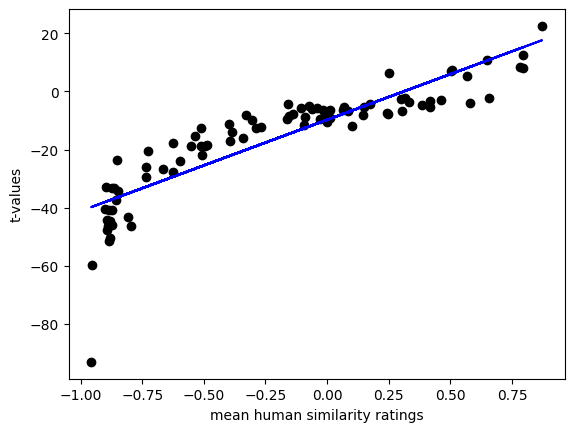

correlation between embedding scores and human ratings: r=0.17, p=0.1


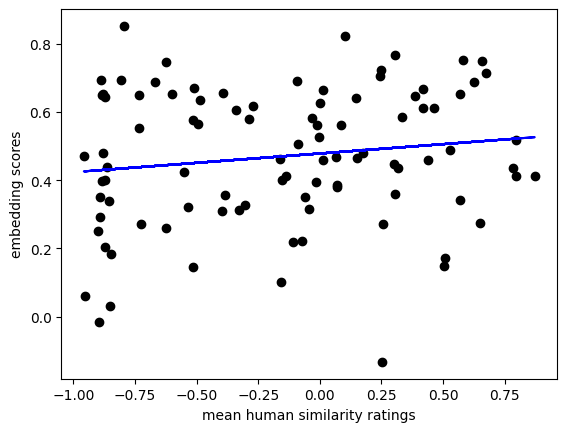

('huge', 'dumb'): coord(-0.95, 0.06), sim=-0.95, assoc=0
('dollar', 'people'): coord(-0.9, -0.017), sim=-0.9, assoc=0
('old', 'fresh'): coord(-0.85, 0.032), sim=-0.85, assoc=0.91
('milk', 'juice'): coord(-0.79, 0.85), sim=-0.79, assoc=0.14
('cab', 'bus'): coord(-0.62, 0.75), sim=-0.62, assoc=0.16
('say', 'participate'): coord(-0.51, 0.15), sim=-0.51, assoc=0.21
('big', 'heavy'): coord(-0.16, 0.1), sim=-0.16, assoc=0.21
('explain', 'prove'): coord(0.1, 0.82), sim=0.1, assoc=0.14
('letter', 'character'): coord(0.25, -0.13), sim=0.25, assoc=-1
('recent', 'new'): coord(0.5, 0.15), sim=0.5, assoc=0.13
('couple', 'pair'): coord(0.51, 0.17), sim=0.51, assoc=0.47


In [6]:
# run statistical tests on word embeddings and human ratings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statistics
from sklearn import linear_model


def statistical_test(emb = sgtb_emb):
    # apply transformations to the data
    no_transf, z_transf, norm_transf = dict(), dict(), dict()
    for pair in simlex_pairs + singlish_pairs:
        key = (pair[0], pair[1])
        if key in human_scores:
            v = [int(x) for x in human_scores[key]]
            mean = sum(v) / len(v)
            sd = statistics.stdev(v)
            no_transf[key] = [x for x in v]
            z_transf[key] = [(x - mean) / sd for x in v]
            norm_transf[key] = [(x - 3) / 3 for x in v]

    # extract SimLex similarity and association scores
    sim_scores, assoc_scores = dict(), dict()
    with open(path_simlex, 'r') as f:
        csv_reader = csv.reader(f, delimiter="\t")
        _ = next(csv_reader)
        for _, row in enumerate(csv_reader):
            key = (row[0], row[1])
            sim_scores[key] = float(row[3])
            assoc_scores[key] = float(row[7])

    
    # run t-tests for the SimLex pairs
    t_scores, sim_ratings = [], []
    for pair in simlex_pairs + singlish_pairs:
        key = (pair[0], pair[1])
        human_score = pd.DataFrame(norm_transf[key])
        emb_score = get_emb_score(key[0], key[1], emb)

        # check if a score can be obtained for this word pair
        if emb_score != None:
            t, p = stats.ttest_1samp(a=human_score, popmean=emb_score)

            # only consider scores which are statistically significant
            if p < 0.05:
                t_scores.append(t)
                sim_ratings.append(sum(norm_transf[key]) / len(norm_transf[key]))

    # run linear regression between t-scores and similarity scores
    reg = linear_model.LinearRegression().fit(np.array([sim_ratings]).T, t_scores)
    print('linear regression coefficient of determination:', reg.score(np.array([sim_ratings]).T, t_scores))

    # plot scatterplot and best-fit line
    grad, intercept = reg.coef_.reshape(1,), reg.intercept_
    plt.scatter(sim_ratings, t_scores, color="black")
    plt.plot(sim_ratings, grad * sim_ratings + intercept, color="blue")
    plt.xlabel('mean human similarity ratings')
    plt.ylabel('t-values')
    plt.show()

    
    # run correlation on embedding scores vs human ratings
    rating_means, emb_scores = [], []
    for pair in simlex_pairs + singlish_pairs:
        key = (pair[0], pair[1])
        emb_score = get_emb_score(key[0], key[1], emb)

        # check if a score can be obtained for this word pair
        if emb_score != None:
            emb_scores.append(emb_score)
            rating_means.append(sum(norm_transf[key]) / len(norm_transf[key]))
    
    rating_means = np.array([rating_means]).T
    emb_scores = np.array(emb_scores)
    r, p = stats.spearmanr(emb_scores, rating_means)
    print('correlation between embedding scores and human ratings: r=%.2g, p=%.2g' % (r, p))

    # plot scatterplot and best-fit line
    grad, intercept = np.polyfit(rating_means.reshape(95,), emb_scores, 1)
    plt.scatter(rating_means, emb_scores, color="black")
    plt.plot(rating_means, grad * rating_means + intercept, color="blue")
    plt.xlabel('mean human similarity ratings')
    plt.ylabel('embedding scores')
    plt.show()
    
    # locate outliers
    outliers = []
    for pair in simlex_pairs + singlish_pairs:
        key = (pair[0], pair[1])
        emb_score = get_emb_score(key[0], key[1], emb)
        if emb_score != None:
            human_rating = sum(norm_transf[key]) / len(norm_transf[key])
            if abs(grad * human_rating + intercept - emb_score) > 0.3:
                outliers.append((key, human_rating, emb_score))
    outliers.sort(key=lambda x: x[1])
    
    for ol in outliers:
        print(f'{ol[0]}:', 'coord(%.2g, %.2g), sim=%.2g, assoc=%.2g' % (ol[1], ol[2], ol[1], \
                -1 if ol[0] not in assoc_scores else assoc_scores[ol[0]]))


statistical_test(sgtb_emb)
# statistical_test(coca_emb)

In [7]:
# deprecated functions
def compare_scores(pairs, num_to_show = None, print_missing_keys = False, emb = sgtb_emb):
    """
    Compares the scores assigned by humans against an embedding, for each word pair.
    """
    scores = []
    for pair in pairs:
        emb_score, human_score = -1, -1

        try:
            emb_score = emb.wv.similarity(pair[0], pair[1])
        except Exception as e:
            if print_missing_keys:
                print('emb missing key:', e)

        key = (pair[0], pair[1])
        if key in human_scores:
            v = human_scores[key]
            human_score = sum([int(x) for x in v]) / len(v) # find average
            human_score = (human_score - 3) / 3             # normalization to the range [0,1]
            human_score = round(human_score, 8)
        else:
            if print_missing_keys:
                print('human study missing key:', key)

        if emb_score != -1 and human_score != -1:
            scores.append({
                "pair": pair, "diff": emb_score - human_score,
                "emb": emb_score, "human": human_score
            })
    scores.sort(key=lambda x: x["diff"], reverse=True)

    if print_missing_keys: print('-' * 20)
    if num_to_show and num_to_show * 2 < len(scores):
        for x in scores[:num_to_show]: print(x)
        for x in scores[-num_to_show:]: print(x)
    else:
        for x in scores: print(x)


# compare_scores(simlex_pairs, 5, emb=coca_emb)
# compare_scores(singlish_pairs, 5, emb=sgtb_emb)
# compare_scores_tTest(simlex_pairs, 5, emb=coca_emb)
# compare_scores_tTest(singlish_pairs, 5, emb=sgtb_emb)